In [1]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms # to convert to numpy array
import matplotlib.pyplot as plt
import unittest
import numpy as np

# vta: Mini-Challenge Gradient Descent

The goal of this assignment is for you to gain a basic understanding of numerical approximation methods in higher dimensions, specifically Gradient Descent and its practical applications. For this, you are to create a Jupyter Notebook and load and explore the MNIST dataset. Then you are to create and train a neural network to correctly classify the images. Only the specified Python packages may be used.

The goal of this assignment is not only to demonstrate your mathematical knowledge, but also to communicate and present your results appropriately. Thus, your submissions should not only be mathematically correct, but also easy to understand and reproduce. For more specifics on what is expected of the submission, please refer to the Evaluation Criteria. Document your work progress and knowledge gain in the form of a learning diary to record learning progress, difficulties and insights.
The following tasks specify the individual processing steps and provide the structure of the notebook.

*Translated with [DeepL](https://www.DeepL.com/Translator)*

## Activation functions
The activation function is a critical component of neural networks that helps introduce **non-linearity** to the model. It plays a crucial role in determining the output of a neural network for a given input. With the advent of deep learning, researchers and practitioners have explored a wide range of activation functions to improve the performance of neural networks.

In this chapter, we will provide an overview of the most commonly used activation functions and compare their strengths and weaknesses. We will delve into the different use cases for each activation function and how they impact the training of neural networks.


### ReLU

#### Advantages of ReLU:
1. **Non-linearity**: ReLU introduces non-linearity, allowing the model to learn complex patterns.
$$
f(x) = max(0, x)
$$

2. **Computational efficiency**: ReLU is computationally efficient due to its simple form.

3. **Sparse activation**: ReLU promotes sparsity, reducing model complexity.
Why? $f(x) = 0$ for $x < 0$, encouraging fewer active neurons.

#### Disadvantages of ReLU:
1. **Dying ReLU**: Neurons can "die" if inputs are consistently negative.
Why? $f(x) = 0$ for $x < 0$, leading to no gradient updates.

2. **Non-differentiable at 0**: ReLU is not differentiable at $x=0$.
Why? Discontinuity at $x=0$.

3. **Non-zero centered**: ReLU outputs are not zero-centered, causing optimization issues.
Why? Biased gradients can hinder learning.

**Sources**:
* [Top 10 Activation Function's Advantages & Disadvantages](https://www.linkedin.com/pulse/top-10-activation-functions-advantages-disadvantages-dash/)

* [A Gentle Introduction to the Rectified Linear Unit (ReLU) - MachineLearningMastery.com](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)

* [Activation Functions and Loss Functions for neural networks — How to pick the right one? | by Indraneel Dutta Baruah | Analytics Vidhya | Medium](https://medium.com/analytics-vidhya/activation-functions-and-loss-functions-for-neural-networks-how-to-pick-the-right-one-542e1dd523e0)

In [2]:
def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return x > 0

### Sigmoid

#### Advantages of Sigmoid:
1. **Smooth and differentiable**: Sigmoid is a smooth, differentiable function.
$$
f(x) = \frac{1}{1 + e^{-x}}
$$

2. **Range**: Sigmoid maps input to $(0, 1)$, providing normalized outputs.
Why? Useful for probabilistic interpretations and binary classification.

3. **Non-linearity**: Sigmoid introduces non-linearity, allowing complex pattern learning.

#### Disadvantages of Sigmoid:
1. **Vanishing gradient**: Sigmoid suffers from vanishing gradient problem.
Why? Gradients can be small ($f'(x) \approx 0$) for large $|x|$, slowing learning.

2. **Non-zero centered**: Sigmoid outputs are not zero-centered, causing optimization issues.
Why? Biased gradients can hinder learning.

3. **Computational complexity**: Sigmoid is computationally more complex than ReLU.
Why? Exponential calculation in the function.

**Sources**:
* [Sigmoid Activation Function](https://insideaiml.com/blog/Sigmoid-Activation-Function-1031)

* [Top 10 Activation Function's Advantages & Disadvantages](https://www.linkedin.com/pulse/top-10-activation-functions-advantages-disadvantages-dash/)

* [Sigmoid Function – LearnDataSci](https://www.learndatasci.com/glossary/sigmoid-function/#:~:text=A%20sigmoid%20function%20is%20a,number%20between%200%20and%201)

In [3]:
def sigmoid(x):
    x = np.clip(x, -500, 500) # clip x to prevent overflow
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

### Softmax

The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. Softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.

#### Advantages of Softmax activation function:
1. **Probabilistic interpretation**: Softmax produces a probability distribution over the output classes. The sum of all the probabilities is 1 (100%).

$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}
$$

Where $z_i$ is the input to the Softmax function and $K$ is the number of classes.

2. **Differentiable**: Softmax is differentiable, which is essential for gradient-based optimization methods like gradient descent.

3. **Suitable for multi-class classification**: Softmax is well-suited for multi-class classification problems as it produces a probability distribution over all classes.

#### Disadvantages of Softmax activation function:
1. **Inappropriate for binary classification**: While Softmax can be used for binary classification, it is computationally inefficient compared to using a sigmoid activation function.

2. **Susceptible to vanishing gradients**: Softmax may result in vanishing gradients when used with certain loss functions (e.g., mean squared error) in deep networks, slowing down learning.

3. **Numerical instability**: Softmax can lead to numerical instability due to exponentiation of large values. This can be mitigated using the log-sum-exp trick:
$$ 
\sigma(z)_i = \frac{e^{z_i - c}}{\sum_{j=1}^K e^{z_j - c}}
$$
Where $c = \max_i z_i$.

**Source**:
* [Softmax Activation Function with Python - MachineLearningMastery.com](https://machinelearningmastery.com/softmax-activation-function-with-python/)

* [How to implement the derivative of Softmax independently from any loss function | by Ms Aerin | IntuitionMath | Medium](https://medium.com/intuitionmath/how-to-implement-the-softmax-derivative-independently-from-any-loss-function-ae6d44363a9d)

In [4]:
def softmax(x):
    x = x - np.max(x, axis=1, keepdims=True) # prevent overflow
    x = np.exp(x)
    x = x / np.sum(x, axis=1, keepdims=True)
    return x

def softmax_grad(x):
    return softmax(x) * (1 - softmax(x))

## Loss functions

The loss function is a key component of neural network training that plays a crucial role in optimizing the model's performance. It is used to measure the difference between the predicted and actual values of the output, and the objective of training is to minimize this difference.

In this chapter, we will provide an overview of the most commonly used loss functions for both binary- and multi-classification tasks and compare their strengths and weaknesses. We will delve into the different use cases for each loss function and how they impact the training of neural networks.

### Mean Squared Error

The Mean Squared Error (MSE) loss function measures the average squared difference between the true values and the predicted values. It is commonly used in regression tasks to quantify the discrepancy between the model's predictions and the ground truth.

$$
L(y, \hat{y}) = \frac{1}{N}(y - \hat{y})^2 
$$


#### Advantages of MSE loss:
1. **Continuity and differentiability**: MSE is a continuous and differentiable function.

2. **Simple to compute**: MSE is easy to compute and differentiate.

3. **Intuitive interpretation**: MSE measures the average squared error between predictions and true values.

4. **Commonly used**: MSE is a widely-used loss function for regression tasks.

#### Disadvantages of MSE loss:
1. **Suboptimal for classification**: MSE is more suited for regression tasks.
Why? It doesn't directly optimize for class probabilities or decision boundaries.

2. **Sensitivity to outliers**: MSE is sensitive to outliers, skewing predictions.
Why? Squaring errors exaggerates the impact of extreme values.

3. **Inconsistent gradient magnitude**: MSE gradients depend on the error magnitude.
Why? Large errors lead to larger gradients, potentially causing overshooting.

4. **Non-probabilistic interpretation**: MSE doesn't provide probability calibration.
Why? It doesn't focus on optimizing probabilities, which are useful for thresholding and classification tasks.

**Sources**:
* [Mean squared error - Wikiwand](https://www.wikiwand.com/en/Mean_squared_error)

* [Mean Squared Error: Definition and Example - Statistics How To](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/)

In [5]:
def mse(y_pred, y_true):
    batch_size = y_pred.shape[0]
    loss = np.sum((y_pred - y_true)**2) / batch_size
    return loss

def mse_grad(y_pred, y_true):
    batch_size = y_pred.shape[0]
    grad = 2 * (y_pred - y_true) / batch_size
    return grad

### Cross-Entropy
$$
 L =-\frac{1}{N}\left(\sum_{i=1}^N \mathbf{y}_{\mathbf{i}} \cdot \log \left(\hat{\mathbf{y}}_{\mathbf{i}}\right)\right)
$$

Cross-entropy is the default loss function to use for multi-class classification problems. 

Cross entropy computes a score that summarizes the average difference between the actual and predicted probability distributions for all classes of the problem. The score is minimized and a perfect cross entropy value is 0.

The ground truth $y$ gives all probability to the first value, and the other values are zero, so we can ignore them, and just use the matching term from the estimate $\hat{\mathbf{y}}$. For example:

$$
\begin{aligned}
& L =-(1 \times \log (0.1)+0 \times \log (0.5)+\ldots) \\
& L =-\log (0.1) \approx 2.303
\end{aligned}
$$

The main feature of this loss function is that only the probabilities of the correct classes are rewarded/punished. The cross-entropy loss function is often averaged over the batch size, so that the loss function is independent of the batch size.

#### Advantages of cross-entropy loss function:
1. **Probabilistic interpretation**: Cross-entropy loss measures the difference between two probability distributions, making it suitable for classification tasks where the output is a probability distribution.

2. **Faster convergence**: Cross-entropy loss generally converges faster than other loss functions (e.g., mean squared error) when used with logarithmic activation functions like sigmoid or softmax, as it avoids the vanishing gradient problem.

3. **Differentiable**: Cross-entropy loss is differentiable, which is crucial for gradient-based optimization methods like gradient descent.

$$
H(y, \hat{y}) = -\sum_{i=1}^N y_i \log(\hat{y}_i)
$$

#### Disadvantages of cross-entropy loss function:
1. **Inapplicable to non-probabilistic tasks**: Cross-entropy loss is not suitable for regression tasks, where the output is a continuous value rather than a probability distribution.

2. **Numerical instability**: Cross-entropy loss involves logarithmic operations, which can lead to numerical instability when predicted probabilities are very close to 0 or 1. This issue can be mitigated by clipping the predicted probabilities to a small range (e.g., [1e-8, 1-1e-8]).

3. **Requires normalized outputs**: Cross-entropy loss assumes that the model's output is a probability distribution. This requires the use of appropriate activation functions, such as softmax for multi-class classification or sigmoid for binary classification, in the output layer.

When using the cross-entropy loss function, the gradient of the loss function is given by:

$$
\frac{\partial L}{\partial z_{j}} = \hat{\mathbf{y}}_i-\mathbf{y}_i
$$

This partial derivative take advantage of the fact that the Softmax activation function is a normalized exponential function. Therefore, the gradient of the cross-entropy loss function is simplified to the difference between the predicted and the actual class probabilities.

**Sources**:
* [Derivative of Softmax and the Softmax Cross Entropy Loss | David Bieber](https://davidbieber.com/snippets/2020-12-12-derivative-of-softmax-and-the-softmax-cross-entropy-loss/)

* [Killer Combo: Softmax and Cross Entropy | by Paolo Perrotta | Level Up Coding](https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba)

* [A Gentle Introduction to Cross-Entropy for Machine Learning - MachineLearningMastery.com](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)

In [6]:
def cross_entropy(y_pred, y_true):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1-eps) # clip y_pred to prevent log(0) or log(1)
    loss = -(y_true * np.log(y_pred)).sum(axis=1).mean()
    return loss

def cross_entropy_grad(y_pred, y_true):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1-eps) # clip y_pred to prevent division by 0
    grad = y_pred - y_true
    return grad

### Binary Cross-Entropy
#### Advantages of BCE loss:
1. **Probabilistic interpretation**: BCE measures the error between true binary labels and predicted probabilities, optimizing for class probabilities.
$$
L(y, \hat{y}) = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]
$$

2. **Suitable for classification**: BCE is designed for binary classification tasks, directly optimizing decision boundaries.

3. **Robust to outliers**: BCE is less sensitive to outliers compared to MSE, as it doesn't square errors.

4. **Stable gradients**: BCE provides stable and informative gradient signals for classification tasks, facilitating learning.

#### Disadvantages of BCE loss:
1. **Not suitable for multi-class problems**: BCE is designed for binary classification and requires modification (e.g., categorical cross-entropy) for multi-class problems.

2. **Requires probability input**: BCE loss expects predicted probabilities as input, requiring an activation function (e.g., sigmoid) to convert raw model outputs.

3. **Logarithm computation**: BCE involves logarithm computations, which can be computationally more expensive than simple arithmetic operations (e.g., in MSE).

**The gradient**:

$$
\begin{aligned}
\frac{\partial L(y)}{\partial y} & =\frac{\partial(-t \log (y)-(1-t) \log (1-y))}{\partial y}=\frac{\partial(-t \log (y))}{\partial y}+\frac{\partial(-(1-t) \log (1-y))}{\partial y} \\
& =-\frac{t}{y}+\frac{1-t}{1-y}=\frac{y-t}{y(1-y)}
\end{aligned}
$$

**Sources**:
- [Understanding binary cross-entropy / log loss: a visual explanation | by Daniel Godoy | Towards Data Science](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

- [Where did the Binary Cross-Entropy Loss Function come from? | by Rafay Khan | Towards Data Science](https://towardsdatascience.com/where-did-the-binary-cross-entropy-loss-function-come-from-ac3de349a715)

- [r - Gradient for logistic loss function - Cross Validated](https://stats.stackexchange.com/questions/219241/gradient-for-logistic-loss-function)

- [Logistic classification with cross-entropy (1/2)](https://peterroelants.github.io/posts/cross-entropy-logistic/)

In [7]:
def binary_cross_entropy(y_pred, y_true):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1-eps) # clip y_pred to prevent log(0) or log(1)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

def binary_cross_entropy_grad(y_pred, y_true):
    eps = 1e-15
    # y_pred = np.clip(y_pred, eps, 1-eps) # clip y_pred to prevent division by 0
    return (y_pred - y_true) / (y_pred * (1 - y_pred) + eps) # add eps to prevent division by 0

### Focal Loss
$$
F L\left(p_t\right)=-a_t\left(1-p_t\right)^\gamma \log \left(p_t\right)
$$
The variable $p_t$ is a function of the ground truth $y$ and a prediction $p$ :
$$
p_t= \begin{cases}p & \text { if } y=1 \\ 1-p & \text { otherwise }\end{cases}
$$

Focal Loss is an extension of Cross-Entropy loss, primarily designed to address class imbalance issues in classification tasks. It was introduced by Lin et al. in the paper "Focal Loss for Dense Object Detection" (see Tsung-Yi Lin et al. “Focal Loss for Dense Object Detection” below).

**Alpha $\alpha$** is the class weighting factor, typically between 0 and 1, which controls the balance between positive and negative samples. A higher $\alpha$ value increases the weight of positive samples, effectively focusing more on the minority class (i.e., the 4s). Conversely, a lower $\alpha$ value reduces the importance of the minority class.

**Gamma $\gamma$** is the focusing parameter, usually non-negative, that modulates the contribution of easy and hard examples during training. A higher $\gamma$ value reduces the impact of easy examples and amplifies the influence of hard examples, thus encouraging the model to learn more from challenging instances.

#### Advantages of Focal Loss:

1. **Handles class imbalance**: Focal Loss is designed to handle class imbalance by down-weighting the contribution of easy-to-classify examples and focusing on hard-to-classify examples.

1. **Adjustable focusing parameter**: The focusing parameter $\gamma$ controls the degree of down-weighting for easy examples, allowing users to fine-tune the balance between classes.

2. **Compatible with multi-class tasks**: Focal Loss can be easily extended to multi-class tasks by adapting the categorical cross-entropy loss.

3. **Improved performance**: Focal Loss can improve the performance of classification models, especially when class imbalance is present, by helping the model focus on difficult examples.

#### Disadvantages of Focal Loss:

1. **Complexity**: Focal Loss is more complex compared to traditional cross-entropy loss due to the additional focusing parameter and the computation of the modulating factor.

2. **Hyperparameter tuning**: The focusing parameter $\gamma$ may require hyperparameter tuning to find the best value for a specific task, adding complexity to the training process.

3. **Limited benefits in balanced datasets**: The main advantage of Focal Loss is its ability to handle class imbalance. In balanced datasets, it might not provide significant benefits over traditional cross-entropy loss.

In summary, Focal Loss is advantageous when dealing with class imbalance, as it helps the model focus on hard-to-classify examples. However, it introduces additional complexity and requires hyperparameter tuning for the focusing parameter, which might not be beneficial for balanced datasets.

**Sources**:
* [Tsung-Yi Lin et al. “Focal Loss for Dense Object Detection”](https://arxiv.org/abs/1708.02002)

* [Focal Loss: A better alternative for Cross-Entropy | by Roshan Nayak | Towards Data Science](https://towardsdatascience.com/focal-loss-a-better-alternative-for-cross-entropy-1d073d92d075)

* [Understanding Focal Loss in 5 mins | Medium | VisionWizard](https://medium.com/visionwizard/understanding-focal-loss-a-quick-read-b914422913e7)

* [Focal loss implementation for LightGBM • Max Halford](https://maxhalford.github.io/blog/lightgbm-focal-loss/#formulas-for-focal-loss)

In [8]:
alpha, gamma = .9, 2

def at(y):
    if alpha is None:
        return np.ones_like(y)
    return np.where(y, alpha, 1 - alpha)

def pt(y, p):
    p = np.clip(p, 1e-15, 1 - 1e-15)
    return np.where(y, p, 1 - p)

def focal_loss(y_pred, y_true):
    atv = at(y_true)
    ptv = pt(y_true, y_pred)
    return -atv * (1 - ptv) * gamma * np.log(ptv)

def focal_loss_grad(y_pred, y_true):
    y = 2 * y_true - 1  # {0, 1} -> {-1, 1}
    atv = at(y_true)
    ptv = pt(y_true, y_pred)
    g = gamma
    return atv * y * (1 - ptv) ** g * (g * ptv * np.log(ptv) + ptv - 1)

### Kullback–Leibler divergence
Kullback Leibler Divergence, or KL Divergence for short, is a measure of how one probability distribution differs from a baseline distribution.

A KL divergence loss of 0 indicates that the distributions are identical. In practice, the behavior of KL divergence is very similar to cross entropy. It calculates how much information is lost when the predicted probability distribution is used to approximate the desired target probability distribution.

#### Advantages of KL divergence loss function:
1. **Probabilistic interpretation**: KL divergence measures the difference between two probability distributions, making it suitable for tasks where the output is a probability distribution.

2. **Asymmetric**: KL divergence is asymmetric, making it sensitive to the ordering of the true and predicted distributions. This can be advantageous when the direction of the divergence matters.

$$
D_{KL}(P || Q) = \sum_{i} P(i) \log \frac{P(i)}{Q(i)}
$$

3. **Differentiable**: KL divergence is differentiable, which is important for gradient-based optimization methods like gradient descent.

#### Disadvantages of KL divergence loss function:
1. **Non-negative**: KL divergence is non-negative, which may not be ideal for certain optimization algorithms that rely on negative values to indicate convergence.

2. **Inapplicable to non-probabilistic tasks**: KL divergence is not suitable for regression tasks, where the output is a continuous value rather than a probability distribution.

3. **Not symmetric**: KL divergence is not symmetric, meaning that $D_{KL}(P || Q) \neq D_{KL}(Q || P)$. In some applications, a symmetric measure of divergence might be more appropriate.

4. **Requires normalized outputs**: KL divergence assumes that the model's output is a probability distribution. This requires the use of appropriate activation functions, such as softmax for multi-class classification or sigmoid for binary classification, in the output layer.

5. **Numerical instability**: KL divergence involves logarithmic operations, which can lead to numerical instability when predicted probabilities are very close to 0. This issue can be mitigated by adding a small constant to the predicted probabilities or using a modified version of the KL divergence that avoids division by zero.

**Sources**:
* [Kullback–Leibler divergence - Wikiwand](https://www.wikiwand.com/en/Kullback%E2%80%93Leibler_divergence)

* [Understanding KL Divergence. A guide to the math, intuition, and… | by Aparna Dhinakaran | Towards Data Science](https://towardsdatascience.com/understanding-kl-divergence-f3ddc8dff254)

## Task 1 — Loading and inspecting the data
> Load the MNIST dataset using the torchvision package (Use the torchvision package for this task) and use matplotlib to get an overview of the data. Describe the basic properties of the dataset, such as how much and what data it contains. *Translated with [DeepL](https://www.deepl.com/translator)*

This code performs several data preprocessing steps for the MNIST dataset. 

First, it defines a set of transformations to be applied to the data using the `transforms.Compose` function. The `ToTensor()` function converts the input data from a numpy array to a PyTorch tensor.

Then, it loads the MNIST dataset using the `datasets.MNIST` function and applies the defined transformations to the data. It separates the training and testing data and labels into separate arrays `X_train`, `y_train`, `X_test`, and `y_test`.

Next, it reshapes the data arrays `X_train` and `X_test` from 2D arrays of shape [N, 28, 28] to 1D arrays of shape [N, 784]. This step flattens each image into a 1D vector of 784 values.

Finally, it normalizes the data arrays `X_train` and `X_test` to be between 0 and 1 by dividing each pixel value by 255.0, which is the maximum pixel value.

The final line of code prints the shape of the data and label arrays.

In [9]:
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Extract the data and labels from the datasets
X_train, y_train = train_set.data.numpy(), train_set.targets.numpy()
X_test, y_test = test_set.data.numpy(), test_set.targets.numpy()

# Reshape the data to be of size [N x 784]
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize the data to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape, X_test.shape, y_train.shape, y_test.shape

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




100.0%
100.0%

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



((60000, 784), (10000, 784), (60000,), (10000,))

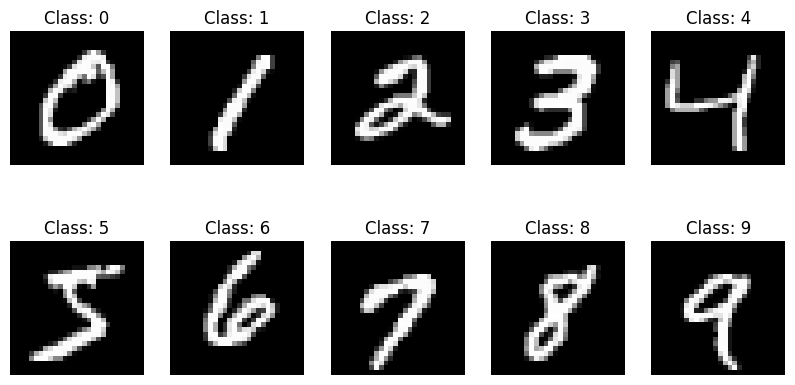

In [10]:
classes = np.unique(y_train)

# Plot the images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[y_train == classes[i]][0].reshape(28, 28), cmap='gray')
    ax.set_title(f"Class: {classes[i]}")
    ax.axis('off')

plt.show()

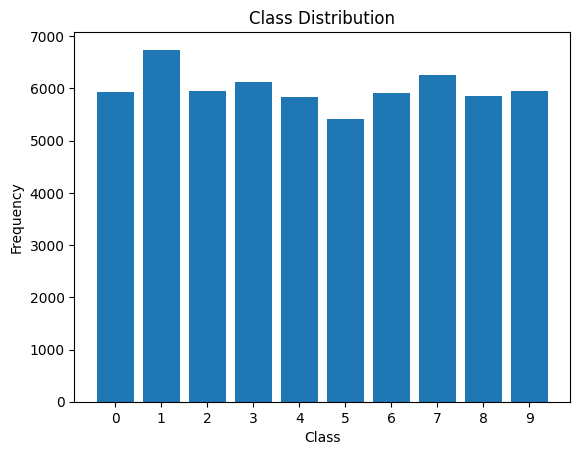

In [11]:
# visualise the distribution of the classes
plt.bar(classes, np.bincount(y_train))
plt.xticks(classes)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.show()


In [12]:
print('Number of training examples: ', X_train.shape[0])
print('Number of testing examples: ', X_test.shape[0])
print('Each image is of size: ', X_train.shape[1])
print('There are {} classes: {}'.format(len(classes), classes))
print('The data is of type: ', X_train.dtype)
print('The labels are of type: ', y_train.dtype)
print('The range of the pixel values is [{}, {}]'.format(np.min(X_train), np.max(X_train)))

Number of training examples:  60000
Number of testing examples:  10000
Each image is of size:  784
There are 10 classes: [0 1 2 3 4 5 6 7 8 9]
The data is of type:  float64
The labels are of type:  int64
The range of the pixel values is [0.0, 1.0]


In [13]:
for i in range(len(classes)):
    print(f"Class {classes[i]}: {np.sum(y_train == classes[i])} train examples, {np.sum(y_test == classes[i])} test examples")

Class 0: 5923 train examples, 980 test examples
Class 1: 6742 train examples, 1135 test examples
Class 2: 5958 train examples, 1032 test examples
Class 3: 6131 train examples, 1010 test examples
Class 4: 5842 train examples, 982 test examples
Class 5: 5421 train examples, 892 test examples
Class 6: 5918 train examples, 958 test examples
Class 7: 6265 train examples, 1028 test examples
Class 8: 5851 train examples, 974 test examples
Class 9: 5949 train examples, 1009 test examples


## Task 2 — Implementing a linear layer

> Create a class for a linear layer with any number of nodes. Implement the forward, backward, and update methods using numpy. Write appropriate unit tests to verify that the function works. *Translated with [DeepL](https://www.deepl.com/translator)*

### Linear Layer

This class represents a linear layer in a neural network. The `__init__` function initializes the layer's parameters, including the input size, output size, activation function, and its derivative. It also initializes the weights and biases randomly with small values.

The `forward` function computes the output of the layer by taking the dot product of the input with the layer's weights and adding the bias. If the activation function is not `None`, it applies it to the linear output and returns the result.

The `backward` function computes the gradient of the loss with respect to the layer's weights, biases, and inputs. If an activation function exists, it computes the gradient of the loss with respect to the output before applying the activation function. Then it computes the gradient of the loss with respect to the input by taking the dot product of the gradient of the loss with respect to the output and the transpose of the layer's weights.

The `update` function updates the weights and biases using gradient descent by subtracting the product of the learning rate and the gradients from the current values.

Overall, this class implements a fully connected layer with an optional activation function that can be used in a neural network.

In [14]:
class LinearLayer:
    def __init__(self, input_size, output_size, activation_fn=None, activation_fn_grad=None):
        """
        Initialize LinearLayer with given input_size, output_size, and activation functions.

        :param input_size: number of input neurons
        :param output_size: number of output neurons
        :param activation_fn: activation function (default: None)
        :param activation_fn_grad: gradient of the activation function (default: None)
        """
        self.x = None  # input to the layer
        self.bias_grad = None  # gradient of the bias
        self.weights_grad = None  # gradient of the weights

        self.input_size = input_size
        self.output_size = output_size
        self.activation_fn = activation_fn
        self.activation_fn_grad = activation_fn_grad
        self.weights = np.random.randn(input_size, output_size) * 0.01  # initialize weights with small random values
        self.bias = np.zeros((1, output_size))  # initialize bias with zeros

    def forward(self, x):
        """
        Perform forward pass of the layer.

        :param x: input to the layer
        :return: output of the layer
        """
        self.x = x
        linear_output = np.dot(x, self.weights) + self.bias  # compute linear output of the layer
        
        if self.activation_fn is None:
            return linear_output
        
        return self.activation_fn(linear_output)  # apply activation function to the linear output

    def backward(self, grad_output, hidden_output=None):
        """
        Perform backward pass of the layer.

        :param grad_output: gradient of the output of the layer
        :param hidden_output: output of the layer before activation (default: None)
        :return: gradient of the input to the layer
        """
        if self.activation_fn_grad is not None:
            if hidden_output is not None:
                grad_output = self.activation_fn_grad(hidden_output) * grad_output  # apply chain rule
            else:
                grad_output = self.activation_fn_grad(grad_output) * grad_output  # apply chain rule
        
        self.weights_grad = np.dot(self.x.T, grad_output)  # compute gradient of the weights
        self.bias_grad = np.sum(grad_output, axis=0, keepdims=True)  # compute gradient of the bias
        return np.dot(grad_output, self.weights.T)  # compute gradient of the input to the layer

    def update(self, lr):
        """
        Update the weights and bias of the layer using gradient descent.

        :param lr: learning rate
        """
        self.weights -= lr * self.weights_grad  # update weights
        self.bias -= lr * self.bias_grad  # update bias

### Unit Testing

The code is defining a unit test class `TestLinearLayer` that tests the functionality of a custom implementation of a linear layer neural network module. The module is defined in a separate implementation file, and it is instantiated and tested within the methods of the test class. 

The test class has several test methods. 

1. `setUp`: this method is called before each test method is run and it sets up the input and output sizes of the linear layer, as well as instantiating the linear layer module. 

2. `test_forward`: this method tests the `forward` method of the linear layer module by generating random input data and checking that the output shape of the linear layer is correct.

3. `test_backward`: this method tests the `backward` method of the linear layer module by generating random input and output data and checking that the gradient input shape is correct.

4. `test_update`: this method tests the `update` method of the linear layer module by manually setting the weights, biases, and their gradients and checking that they are updated correctly.

5. `test_shapes`: this method tests the shapes of the weights and biases gradients by checking that they have the correct shape.

6. `test_numerical_gradient`: this method tests the analytical gradient of the linear layer module against a numerical gradient by calculating the analytical gradient and numerical gradient separately and then checking that they are similar. 

The `unittest.main` method is then called to run all the test methods in the `TestLinearLayer` class.unning these test cases, we can ensure that the `LinearLayer` class and its functions are working correctly.

In [15]:
class TestLinearLayer(unittest.TestCase):
    def setUp(self):
        self.input_size = 10
        self.output_size = 5
        self.linear_layer = LinearLayer(self.input_size, self.output_size, None, None)

    def test_forward(self):
        x = np.random.randn(10, self.input_size) # 10 samples
        output = self.linear_layer.forward(x)
        self.assertEqual(output.shape, (10, self.output_size))

    def test_backward(self):
        x = np.random.randn(10, self.input_size) # 10 samples
        output = self.linear_layer.forward(x)
        grad_output = np.random.randn(10, self.output_size)
        grad_input = self.linear_layer.backward(grad_output)
        self.assertEqual(grad_input.shape, (10, self.input_size))

    def test_update(self):
        self.linear_layer.weights = np.array([[1, 2], [3, 4]], dtype=np.float32)
        self.linear_layer.bias = np.array([[1, 2]], dtype=np.float32)
        self.linear_layer.weights_grad = np.array([[1, 2], [3, 4]], dtype=np.float32)
        self.linear_layer.bias_grad = np.array([[1, 2]], dtype=np.float32)

        self.linear_layer.update(0.1)
        self.assertTrue(np.allclose(self.linear_layer.weights, np.array([[0.9, 1.8], [2.7, 3.6]])))
        self.assertTrue(np.allclose(self.linear_layer.bias, np.array([[0.9, 1.8]])))

    def test_shapes(self):
        x = np.random.randn(1, self.input_size)
        output = self.linear_layer.forward(x)
        grad_output = np.random.randn(1, self.output_size)
        grad_input = self.linear_layer.backward(grad_output)

        self.assertEqual(self.linear_layer.weights_grad.shape, (self.input_size, self.output_size))
        self.assertEqual(self.linear_layer.bias_grad.shape, (1, self.output_size))
    
    def test_numerical_gradient(self):
        def forward_with_weights(w):
            self.linear_layer.weights = w.reshape(self.input_size, self.output_size)
            return self.linear_layer.forward(x)

        def forward_with_bias(b):
            self.linear_layer.bias = b.reshape(1, self.output_size)
            return self.linear_layer.forward(x)

        x = np.random.randn(2, self.input_size)  # 2 samples
        output = self.linear_layer.forward(x)
        grad_output = np.random.randn(2, self.output_size)
        self.linear_layer.backward(grad_output)

        epsilon = 1e-5
        numerical_grad_weights = np.zeros_like(self.linear_layer.weights)
        numerical_grad_bias = np.zeros_like(self.linear_layer.bias)

        # Calculate numerical gradient for weights
        for i in range(self.input_size):
            for j in range(self.output_size):
                original_weight = self.linear_layer.weights[i, j]
                self.linear_layer.weights[i, j] = original_weight + epsilon
                output_plus = forward_with_weights(self.linear_layer.weights)
                self.linear_layer.weights[i, j] = original_weight - epsilon
                output_minus = forward_with_weights(self.linear_layer.weights)
                numerical_grad_weights[i, j] = np.sum((output_plus - output_minus) * grad_output) / (2 * epsilon)
                self.linear_layer.weights[i, j] = original_weight

        # Calculate numerical gradient for bias
        for j in range(self.output_size):
            original_bias = self.linear_layer.bias[0, j]
            self.linear_layer.bias[0, j] = original_bias + epsilon
            output_plus = forward_with_bias(self.linear_layer.bias)
            self.linear_layer.bias[0, j] = original_bias - epsilon
            output_minus = forward_with_bias(self.linear_layer.bias)
            numerical_grad_bias[0, j] = np.sum((output_plus - output_minus) * grad_output) / (2 * epsilon)
            self.linear_layer.bias[0, j] = original_bias

        # Compare analytical and numerical gradients
        self.assertTrue(np.allclose(self.linear_layer.weights_grad, numerical_grad_weights, rtol=1e-4, atol=1e-4))
        self.assertTrue(np.allclose(self.linear_layer.bias_grad, numerical_grad_bias, rtol=1e-4, atol=1e-4))

unittest.main(argv=[''], verbosity=2, exit=False)

test_backward (__main__.TestLinearLayer.test_backward) ... ok
test_forward (__main__.TestLinearLayer.test_forward) ... ok
test_numerical_gradient (__main__.TestLinearLayer.test_numerical_gradient) ... ok
test_shapes (__main__.TestLinearLayer.test_shapes) ... ok
test_update (__main__.TestLinearLayer.test_update) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.008s

OK


## Task 3 — Creating a single layer network

> Create a neural network in numpy with a hidden linear layer and an output node. Train the network to correctly identify the digit 4 (i.e., the output should be 1 for this digit and 0 for all other digits). Train the network on the training data and evaluate it on test data. Use a suitable loss function as well as accuracy function and give their mathematical definition. Justify your choice by weighing the advantages and disadvantages. Briefly discuss other options for Loss and Accuracy. *Translated with [DeepL](https://www.deepl.com/translator)*

### Loss function

**Focal Loss** proves advantageous for the MNIST binary classification task of determining whether a digit is a 4 or not, primarily due to its ability to address class imbalance. The dataset exhibits an imbalanced distribution, with only 9% of 4s and 91% of non-4s. Focal Loss, an extension of Binary Cross Entropy (BCE), modifies the BCE by introducing a tunable focusing parameter, which allows the model to concentrate on misclassified and hard-to-classify examples.

In comparison, Binary Cross Entropy (BCE) is a suitable loss function for the MNIST binary classification task of classifying if a digit is a 4 or not, mainly because it is specifically designed for binary classification problems. Mathematically, BCE calculates the negative log likelihood of the correct class, penalizing the model heavily when its prediction is far from the ground truth. This characteristic makes BCE sensitive to the difference between predicted probabilities and actual labels, thereby promoting accurate classification. 

But Binary Cross Entropy treats both classes equally, which may not be ideal for this specific task. It could cause the model to favor the majority class, resulting in reduced sensitivity to the minority class (4s).

By utilizing the focusing parameter in Focal Loss, the learning algorithm can emphasize hard-to-classify examples, thereby mitigating the issue of class imbalance. This helps to achieve better performance in identifying 4s among the MNIST dataset, compared to both Binary Cross Entropy and Mean Squared Error loss functions.

Mean Squared Error (MSE) loss, on the other hand, is suboptimal for classification tasks, as it focuses on the squared difference between predictions and ground truth. This leads to less effective gradient updates, particularly in the presence of saturating activation functions like sigmoid. Moreover, MSE is more suitable for regression tasks rather than binary classification, and its use may result in subpar performance for the given task.

In conclusion, Focal Loss is the most suitable loss function for the MNIST binary classification task of identifying whether a digit is a 4 or not, given the class imbalance in the dataset.

> The mathematical definition can be viewed in the chapter "Loss functions > Focal loss"

#### Choosing the hyperparameters of the focal loss

Using $\alpha$ = 0.9 and $\gamma$ = 2.0 can be a good option for addressing the imbalance in the MNIST binary classification task because of the following reasons:

1. With $\alpha$ = 0.9, the focal loss function assigns a higher weight to the positive class (i.e., the 4s), which constitutes only about 9% of the dataset. This high alpha value helps the model focus more on the minority class, effectively reducing the impact of the imbalance issue. It aligns with the fact that there are 9% of 4s and 91% of non-4s, essentially increasing the relative importance of the positive class.

1. By setting $\gamma$ = 2.0, the focal loss function modulates the contribution of easy and hard examples during training. This higher gamma value reduces the impact of easy examples (those with low loss) and amplifies the influence of hard examples (those with high loss). This encourages the model to learn more from challenging instances, ensuring that it does not become overly biased towards the majority class.

> These parameter values are set in the original definition of the function in the Chapter "Loss function > Focal Loss"

### Accuracy function
The **F1 score** is an appropriate accuracy metric for the MNIST binary classification task of identifying 4s due to the nature of the task and what it expects. The goal is to identify 4s and non-4s alike. In order to make accuracy a reflective method of judging the model, it is important to understand if the model is successful in identifying 4s (TP). The F1 score combines precision (the proportion of true positive 4s among all predicted 4s) and recall (the proportion of true positive 4s among all actual 4s) through their harmonic mean. This balances false positives and false negatives, ensuring that both are adequately addressed.

In contrast, metrics like naive-accuracy can be misleading, as a classifier that predicts all non-4s will achieve high accuracy (91%) despite failing to identify any 4s (imbalanced dataset 1:10 which is handled in a chapter further down). While other metrics like precision, recall, or the area under the ROC curve (AUC-ROC) can provide useful insights, the F1 score remains a more comprehensive and balanced choice for this specific classification task. The F1 score is calculated like this:

$$
\begin{aligned}
& \text { Precision }=\frac{T P}{T P+F P} \\
& \text { Recall }=\frac{T P}{T P+F N} \\
& F 1 \text { score }=2 * \frac{\text { Precision } * \text { Recall }}{\text { Precision }+ \text { Recall }}
\end{aligned}
$$

In [16]:
def f1_score(y_pred, y_true):
    """
    Compute the F1 score of the predictions.

    :param y_pred: predicted labels
    :param y_true: true labels
    :return: F1 score
    """
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"

    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    if tp + fp == 0 or tp + fn == 0:
        return 0

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

Confusion matrices are useful for evaluating binary classification models because they provide information on true positives, true negatives, false positives, and false negatives. While the F1 score is a useful metric, confusion matrices provide additional insights for improving model performance and understanding in which direct the model is predicting.

In [17]:
def plot_confusion_matrix(cm, class_labels=None, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Plot a confusion matrix.

    :param cm: confusion matrix
    :param class_labels: class labels (default: None)
    :param normalize: normalize the confusion matrix (default: False)
    :param title: title of the plot (default: 'Confusion Matrix')
    :param cmap: colormap (default: plt.cm.Blues)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt = '.2f'
    else:
        fmt = 'd'

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    if class_labels is None:
        class_labels = ['0', '1']

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_labels, yticklabels=class_labels,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    plt.show()

def confusion_matrix(y_true, y_pred, plot=True, plot_title='Confusion Matrix'):
    """
    Compute the confusion matrix of the predictions.

    :param y_true: true labels
    :param y_pred: predicted labels
    :param plot: plot the confusion matrix (default: True)
    :param plot_title: title of the plot (default: 'Confusion Matrix')
    :return: confusion matrix
    """
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"

    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    cm = np.array([[tn, fp], [fn, tp]])

    if plot:
        plot_confusion_matrix(cm, title=plot_title)

    return cm

### Tracking network development
In order to track the development of the training process, we define a class that stores the training and validation loss and accuracy for each epoch. We also define a function that plots the training and validation loss and accuracy for each epoch. This allows us to see how the training process develops over time.

The `NetworkDevelopment` class is responsible for storing the training and validation loss and accuracy for each epoch during the training process of a neural network. It has the following methods:

- `__init__(self, total_epochs)`: Initializes the class with the total number of epochs the network will be trained for. It initializes empty lists to store the training and validation losses and accuracies for each epoch.
- `add_epoch(self, epoch_number, loss, acc_train, acc_test)`: Adds a new development step to the network development by appending the loss, accuracy for training data, and accuracy for validation data of the current epoch to their respective lists. This method returns a string containing the epoch number, loss, and accuracies for training and validation data.
- `plot(self)`: Plots the training and validation loss and accuracy for each epoch using matplotlib. It creates two subplots, one for loss over epochs and another for accuracy over epochs. The method returns the plot.
- `summary(self)`: Prints the final loss and accuracy of the training and validation data, and the average improvements per epoch. It calls the `plot()` method to plot the loss and accuracy data, and then prints the average accuracy change per epoch for both the training and validation data, and the average loss change per epoch.

In [18]:
class NetworkDevelopment:
    """
    Class to manage and visualize the development of a neural network over epochs.

    :param total_epochs: total number of epochs
    """
    def __init__(self, total_epochs):
        self.total_epochs = total_epochs
        self.losses = []
        self.accuracies_train = []
        self.accuracies_test = []

    def add_epoch(self, epoch_number, loss, acc_train, acc_test):
        """
        Add the loss and accuracy for an epoch.

        :param epoch_number: epoch number
        :param loss: loss value
        :param acc_train: accuracy value on training set
        :param acc_test: accuracy value on test set
        :return: a string with information about the epoch
        """
        self.losses.append(loss)
        self.accuracies_train.append(acc_train)
        self.accuracies_test.append(acc_test)

        return f'Epoch {epoch_number}/{self.total_epochs} - loss: {loss:.4f} - acc_train: {acc_train:.4f} - acc_test: {acc_test:.4f}'

    def plot(self):
        """
        Plot the loss and accuracy over epochs.
        """
        epochs = np.arange(1, self.total_epochs + 1)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        ax1.plot(epochs, self.losses)
        ax1.set_title('Loss over Epochs')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax2.plot(epochs, self.accuracies_train, label='Training')
        ax2.plot(epochs, self.accuracies_test, label='Test')
        ax2.set_title('Accuracy over Epochs')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.legend()
        plt.show()

    def summary(self):
        """
        Print a summary of the network's development over epochs.
        """
        self.plot()

        print(f'avg acc change / epoch (Training set): {np.mean(np.diff(self.accuracies_train)):.4f}')
        print(f'avg acc change / epoch (Test set): {np.mean(np.diff(self.accuracies_test)):.4f}')
        print(f'avg loss change / epoch: {np.mean(np.diff(self.losses)):.4f}')


### Batch Training

Training a neural network on large datasets can be computationally expensive and time-consuming. One way to mitigate this challenge is to use batch training, where instead of updating the model's weights after every single data point, the model's parameters are updated after processing a fixed number of data points, known as a batch.

The function `get_batches(x, y, batch_size)` creates batches of images and labels from the training set. The number of images in a batch is defined by the batch size. The batch size is a hyperparameter that can be tuned to improve the training process. The batch size is a trade-off between the number of images used for training and the number of training steps per epoch. A larger batch size results in fewer training steps per epoch, but the training process is less accurate. A smaller batch size results in more training steps per epoch, but the training process is more accurate.

- `x`: A numpy array containing the input data.
- `y`: A numpy array containing the target data.
- `batch_size`: An integer representing the size of each batch.

The function first calculates the number of batches needed to cover the entire dataset by dividing the length of the input data by the batch size. The function then shuffles the input and target data using a random permutation of indices to ensure that the data is not ordered in any particular way. 

The function then uses a generator to yield batches of input and target data. It does this by iterating over the range of indices from 0 to the number of batches times the batch size, with a step size of batch size. For each iteration, it slices the input and target data arrays to extract a batch of size batch_size, and then yields this batch as a tuple of (x_batch, y_batch).

In [19]:
def get_batches(x, y, batch_size):
    """
    Generate batches of data.

    :param x: input data
    :param y: target data
    :param batch_size: size of each batch
    :return: a generator object that yields batches of data
    """
    n_batches = len(x) // batch_size
    
    # shuffle data before creating batches
    idx = np.random.permutation(len(x))
    x = x[idx]
    y = y[idx]

    for i in range(0, n_batches * batch_size, batch_size):
        x_batch = x[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        yield x_batch, y_batch

### Single-Layer Network

This code defines a single-layer neural network class `SingleLayerNetwork` that inherits from the `LinearLayer` class. The `SingleLayerNetwork` class has several methods:

- `__init__` initializes the network's parameters, including the input size, hidden layer size, output size, loss function, and its derivative. It also initializes the hidden and output layers using `LinearLayer` with the appropriate activation functions.
- `forward` computes the forward pass of the network by propagating the input through the hidden and output layers using their `forward` functions.
- `backward` computes the backward pass of the network by propagating the gradient of the loss with respect to the output through the output and hidden layers using their `backward` functions.
- `update` updates the weights and biases of the hidden and output layers using their `update` functions and the learning rate.
- `train` trains the network on the given training data `X_train` and labels `y_train` for a specified number of epochs using mini-batch gradient descent. It computes the accuracy and loss on the training and test data at each epoch and outputs the results if `output` is `True`.
- `predict` makes predictions on the given input data `X` by calling the `forward` function and returning the predictions.
- `evaluate` evaluates the accuracy of the network's predictions on the given input data `X` and labels `y`.
- `summary` prints a summary of the network's development using the `NetworkDevelopment` class.

Overall, this class defines a simple single-layer neural network and its training and evaluation methods.

In [20]:
class SingleLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size, loss_fn, loss_fn_grad, acc_fn):
        """
        Initialize the SingleLayerNetwork.

        :param input_size: size of input layer
        :param hidden_size: size of hidden layer
        :param output_size: size of output layer
        :param loss_fn: loss function
        :param loss_fn_grad: gradient of the loss function
        :param acc_fn: accuracy function
        """
        self.loss_fn = loss_fn
        self.loss_fn_grad = loss_fn_grad
        self.acc_fn = acc_fn

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.hidden_layer = LinearLayer(input_size, hidden_size, relu, relu_grad)
        self.output_layer = LinearLayer(hidden_size, output_size, sigmoid, sigmoid_grad)

    def forward(self, x):
        """
        Compute the forward pass of the network.

        :param x: input data
        :return: output prediction
        """
        self.x = x
        self.h = self.hidden_layer.forward(x)
        self.y_pred = self.output_layer.forward(self.h)
        return self.y_pred

    def backward(self, y_true):
        """
        Compute the backward pass of the network.

        :param y_true: true target data
        :return: gradient of the output
        """
        y_true = y_true.reshape(-1, 1)
        self.y_pred = self.y_pred.reshape(-1, 1)

        grad_output = self.loss_fn_grad(self.y_pred, y_true)

        grad_output = self.output_layer.backward(grad_output)
        grad_output = self.hidden_layer.backward(grad_output)

        return grad_output

    def update(self, lr):
        """
        Update the weights and biases of the network.

        :param lr: learning rate
        """
        self.hidden_layer.update(lr)
        self.output_layer.update(lr)

    def train(self, X_train, y_train, X_test, y_test, lr, epochs, batch_size, output=True):
        """
        Train the network.

        :param X_train: input data for the training set
        :param y_train: target data for the training set
        :param X_test: input data for the test set
        :param y_test: target data for the test set
        :param lr: learning rate
        :param epochs: number of epochs to train for
        :param batch_size: size of each batch
        :param output: whether or not to print output during training
        """
        self.dev = NetworkDevelopment(total_epochs=epochs)
        
        for epoch in range(epochs):
            loss_list = []
            for x_batch, y_batch in get_batches(X_train, y_train, batch_size):
                y_pred = self.forward(x_batch)

                loss = self.loss_fn(y_pred, y_batch)
                loss_list.append(loss)

                self.backward(y_batch)
                self.update(lr)

            acc_train = self.evaluate(X_train, y_train)
            acc_test = self.evaluate(X_test, y_test)
            avg_loss = np.mean(loss_list)

            epoch_str = self.dev.add_epoch(epoch+1, avg_loss, acc_train, acc_test)
            if output:
                print(epoch_str)

    def predict(self, X):
        """
        Make predictions using the trained network.

        :param X: input data
        :return: predicted outputs
        """
        return (self.forward(X) > .5).astype(int).reshape(-1, 1) # threshold at .5

    def evaluate(self, X, y, acc_fn=None):
        """
        Evaluate the accuracy of the network on a given dataset.

        :param X: input data for the dataset
        :param y: target data for the dataset
        :param acc_fn: (optional) custom accuracy function to use
        :return: accuracy of the network on the dataset
        """
        y_pred = self.predict(X).flatten()

        if acc_fn is not None:
            return acc_fn(y_pred, y)
        
        return self.acc_fn(y_pred, y)

    def summary(self):
        """
        Plot the development of loss and accuracy during training and print a summary of the model's performance.
        """
        self.dev.summary()


### Training & Testing

In order to train the model for the task at hand, we need to convert the $y$ data into a binary format. Any label representing a $4$ is converted into a $1$. Any label that does not represent a $4$ will be converted to a $0$.

In [21]:
y_train_4_binary = (y_train == 4).astype(int)
y_test_4_binary = (y_test == 4).astype(int)

We now train the Single-Layer Network on the train and test data with binary encoded labels.

Epoch 1/6 - loss: 0.1233 - acc_train: 0.2705 - acc_test: 0.3086
Epoch 2/6 - loss: 0.1233 - acc_train: 0.5054 - acc_test: 0.5420
Epoch 3/6 - loss: 0.1233 - acc_train: 0.6232 - acc_test: 0.6350
Epoch 4/6 - loss: 0.1233 - acc_train: 0.6658 - acc_test: 0.6701
Epoch 5/6 - loss: 0.1232 - acc_train: 0.6852 - acc_test: 0.6893
Epoch 6/6 - loss: 0.1233 - acc_train: 0.6942 - acc_test: 0.6889


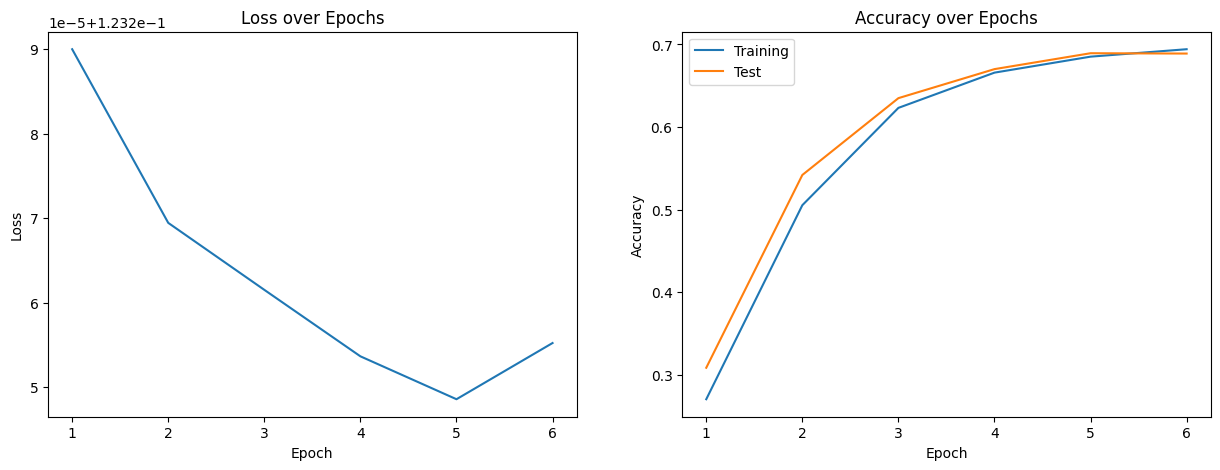

avg acc change / epoch (Training set): 0.0847
avg acc change / epoch (Test set): 0.0761
avg loss change / epoch: -0.0000


In [38]:
slp = SingleLayerNetwork(input_size=784, hidden_size=512, output_size=1, loss_fn=focal_loss, loss_fn_grad=focal_loss_grad, acc_fn=f1_score)
slp.train(X_train, y_train_4_binary, X_test, y_test_4_binary, lr=0.0001, epochs=6, batch_size=32)
slp.summary()

We can observe, that the loss is fluctuating during training. There can be several reasons why that might be the case:

- **Learning rate**: A high learning rate might cause the model to overshoot the optimal weights during gradient descent, causing oscillations in the loss function.
- **Stochastic nature**: When using mini-batch gradient descent, the random selection of samples can cause fluctuations in the loss function.
- **Model complexity**: If the model is too complex, it might overfit the training data, causing small fluctuations in the loss function.
- **Local minima**: The optimizer might be stuck in a local minimum, causing the loss to oscillate in a small range instead of converging to a global minimum.

In [25]:
slp.evaluate(X_test, y_test_4_binary)

0.6354264292408622

The model seems to perform better than random guessing, but presumably struggles with the imbalance in the set. When tuning the hyperparameters better results might be obtained (see chapter below). 

To better understand the predictions of the model, a confusion matrix can be helpful:

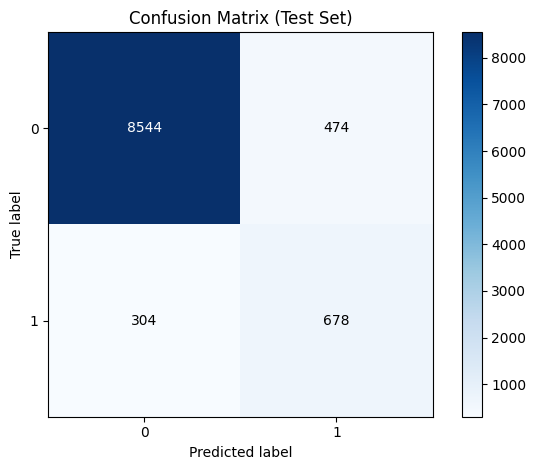

array([[8544,  474],
       [ 304,  678]])

In [27]:
confusion_matrix(y_test_4_binary, slp.predict(X_test), plot=True, plot_title='Confusion Matrix (Test Set)')

We can see that the model is handling the imbalance quite well, but still has room to go.

## Task 4 — Optimizing the single layer network

> Train the network with different learning rates and hidden layer sizes. During training, track the evolution of the loss and accuracy functions on training and test data sets and decide which choice of learning rate and hidden layer size provides the best results in the least amount of time. *Translated with [DeepL](https://www.deepl.com/translator)*

In order to find the right hyperparameters, we define a function that trains the network with different learning rates, epochs, hidden layer sizes and batch sizes. The result for each combination is then stored and analyzed.

This brute force approach is not very efficient, but it allows us to find the best hyperparameters for the network.

The values chosen for the brute force testing are based on common practices that we found during our research of other implementations of single layer neural networks.

> **Note:** The brute force process takes a long time to complete. Therefore, we have commented out the code that runs the brute force process. The best result is described further below.

In [29]:
def get_param_combinations(epochs, batch_sizes, learning_rates, hidden_sizes):
    return [(e, b, l, h) for e in epochs for b in batch_sizes for l in learning_rates for h in hidden_sizes]

epochs = [5, 10]
batch_sizes = [32, 64, 256, 1024]
learning_rates = [0.001, 0.0001, 0.00001]
hidden_sizes = [256, 512]

def test_brute_force_single_layer(param_combos, X_train, y_train, X_test, y_test):
    """
    Tests the SingleLayerNetwork model with a brute-force approach by iterating over all parameter combinations and
    evaluating their accuracy.

    :param param_combos: List of parameter combinations to be tested.
    :param X_train: Training data.
    :param y_train: Training labels.
    :param X_test: Test data.
    :param y_test: Test labels.

    :returns: A tuple containing the highest accuracy achieved and the corresponding parameter combination.
    """
    results = []
    best_acc = 0
    best_param_combo = None

    for i in range(len(param_combos)):
        e, b, l, h = param_combos[i]
        try:
            network = SingleLayerNetwork(input_size=784, hidden_size=h, output_size=1, 
                                        loss_fn=focal_loss, loss_fn_grad=focal_loss_grad,
                                        acc_fn=f1_score)

            network.train(X_train, y_train, X_test, y_test, lr=l, epochs=e, batch_size=b, output=False)
            acc = network.evaluate(X_test, y_test)

            results.append((e, b, l, h, acc))
            if acc > best_acc:
                best_acc = acc
                best_param_combo = param_combos[i]

            print(f"combo {i+1}/{len(param_combos)}: - Epochs: {e} - Batch size: {b} - Learning rate: {l} - Hidden size: {h} - Accuracy: {acc:.4f}")
        except Exception as e:
            print(f"Error: {e}")
            continue

    return best_acc, best_param_combo

sl_combos = get_param_combinations(epochs, batch_sizes, learning_rates, hidden_sizes)
print(f"Testing {len(sl_combos)} parameter combinations")

Testing 48 parameter combinations


In [40]:
# test_brute_force_single_layer(sl_combos, X_train, y_train_4_binary, X_test, y_test_4_binary)

```
combo 1/48: - Epochs: 5 - Batch size: 32 - Learning rate: 0.001 - Hidden size: 256 - Accuracy: 0.0000
combo 2/48: - Epochs: 5 - Batch size: 32 - Learning rate: 0.001 - Hidden size: 512 - Accuracy: 0.0000
combo 3/48: - Epochs: 5 - Batch size: 32 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.4433
combo 4/48: - Epochs: 5 - Batch size: 32 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.6032
combo 5/48: - Epochs: 5 - Batch size: 32 - Learning rate: 1e-05 - Hidden size: 256 - Accuracy: 0.1509
combo 6/48: - Epochs: 5 - Batch size: 32 - Learning rate: 1e-05 - Hidden size: 512 - Accuracy: 0.2421
combo 7/48: - Epochs: 5 - Batch size: 64 - Learning rate: 0.001 - Hidden size: 256 - Accuracy: 0.0000
combo 8/48: - Epochs: 5 - Batch size: 64 - Learning rate: 0.001 - Hidden size: 512 - Accuracy: 0.0000
combo 9/48: - Epochs: 5 - Batch size: 64 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.2079
combo 10/48: - Epochs: 5 - Batch size: 64 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.6511
combo 11/48: - Epochs: 5 - Batch size: 64 - Learning rate: 1e-05 - Hidden size: 256 - Accuracy: 0.1907
combo 12/48: - Epochs: 5 - Batch size: 64 - Learning rate: 1e-05 - Hidden size: 512 - Accuracy: 0.1999
combo 13/48: - Epochs: 5 - Batch size: 256 - Learning rate: 0.001 - Hidden size: 256 - Accuracy: 0.0000
combo 14/48: - Epochs: 5 - Batch size: 256 - Learning rate: 0.001 - Hidden size: 512 - Accuracy: 0.0000
combo 15/48: - Epochs: 5 - Batch size: 256 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.0221
combo 16/48: - Epochs: 5 - Batch size: 256 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.5760
combo 17/48: - Epochs: 5 - Batch size: 256 - Learning rate: 1e-05 - Hidden size: 256 - Accuracy: 0.3002
combo 18/48: - Epochs: 5 - Batch size: 256 - Learning rate: 1e-05 - Hidden size: 512 - Accuracy: 0.2209
combo 19/48: - Epochs: 5 - Batch size: 1024 - Learning rate: 0.001 - Hidden size: 256 - Accuracy: 0.0000
combo 20/48: - Epochs: 5 - Batch size: 1024 - Learning rate: 0.001 - Hidden size: 512 - Accuracy: 0.0000
combo 21/48: - Epochs: 5 - Batch size: 1024 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.5825
combo 22/48: - Epochs: 5 - Batch size: 1024 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.5795
combo 23/48: - Epochs: 5 - Batch size: 1024 - Learning rate: 1e-05 - Hidden size: 256 - Accuracy: 0.2862
combo 24/48: - Epochs: 5 - Batch size: 1024 - Learning rate: 1e-05 - Hidden size: 512 - Accuracy: 0.2299
combo 25/48: - Epochs: 10 - Batch size: 32 - Learning rate: 0.001 - Hidden size: 256 - Accuracy: 0.0000
combo 26/48: - Epochs: 10 - Batch size: 32 - Learning rate: 0.001 - Hidden size: 512 - Accuracy: 0.0000
combo 27/48: - Epochs: 10 - Batch size: 32 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.0020
combo 28/48: - Epochs: 10 - Batch size: 32 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.3748
combo 29/48: - Epochs: 10 - Batch size: 32 - Learning rate: 1e-05 - Hidden size: 256 - Accuracy: 0.3837
combo 30/48: - Epochs: 10 - Batch size: 32 - Learning rate: 1e-05 - Hidden size: 512 - Accuracy: 0.2732
combo 31/48: - Epochs: 10 - Batch size: 64 - Learning rate: 0.001 - Hidden size: 256 - Accuracy: 0.0000
combo 32/48: - Epochs: 10 - Batch size: 64 - Learning rate: 0.001 - Hidden size: 512 - Accuracy: 0.0000
combo 33/48: - Epochs: 10 - Batch size: 64 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.0202
combo 34/48: - Epochs: 10 - Batch size: 64 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.3220
combo 35/48: - Epochs: 10 - Batch size: 64 - Learning rate: 1e-05 - Hidden size: 256 - Accuracy: 0.3544
combo 36/48: - Epochs: 10 - Batch size: 64 - Learning rate: 1e-05 - Hidden size: 512 - Accuracy: 0.2794
combo 37/48: - Epochs: 10 - Batch size: 256 - Learning rate: 0.001 - Hidden size: 256 - Accuracy: 0.0000
combo 38/48: - Epochs: 10 - Batch size: 256 - Learning rate: 0.001 - Hidden size: 512 - Accuracy: 0.0000
combo 39/48: - Epochs: 10 - Batch size: 256 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.0000
combo 40/48: - Epochs: 10 - Batch size: 256 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.4111
combo 41/48: - Epochs: 10 - Batch size: 256 - Learning rate: 1e-05 - Hidden size: 256 - Accuracy: 0.1255
combo 42/48: - Epochs: 10 - Batch size: 256 - Learning rate: 1e-05 - Hidden size: 512 - Accuracy: 0.2474
combo 43/48: - Epochs: 10 - Batch size: 1024 - Learning rate: 0.001 - Hidden size: 256 - Accuracy: 0.0000
combo 44/48: - Epochs: 10 - Batch size: 1024 - Learning rate: 0.001 - Hidden size: 512 - Accuracy: 0.0000
combo 45/48: - Epochs: 10 - Batch size: 1024 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.0535
combo 46/48: - Epochs: 10 - Batch size: 1024 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.2941
combo 47/48: - Epochs: 10 - Batch size: 1024 - Learning rate: 1e-05 - Hidden size: 256 - Accuracy: 0.2884
combo 48/48: - Epochs: 10 - Batch size: 1024 - Learning rate: 1e-05 - Hidden size: 512 - Accuracy: 0.4966
```

Given the brute force testing with the reasonably defined values for the hyperparameters above, the best result was achieved with the following parameter combination:

**Accuracy on test set**: $0.6511406844106464$
(epochs=5, batch_size=64, lr=0.0001, hidden_size=512)

## Task 5 — Classifying all 10 numbers

> Extend the network to 3 hidden layers with the same size and 10 outputs. The goal is the correct classification of all digits. Use a suitable loss function as well as accuracy function and give their mathematical definition. Justify your choice and briefly discuss other possibilities. Vary the learning rate and the size of the hidden layers and choose the best result. *Translated with [DeepL](https://www.deepl.com/translator)*

### Loss function

**Cross Entropy loss** is a preferred choice for the MNIST classification task due to its ability to handle probabilistic outputs effectively. This is especially useful when dealing with multi-class classification problems like MNIST, which involves 10 different digit classes (0-9). Mathematically, Cross Entropy loss quantifies the difference between the predicted probability distribution and the true distribution, incentivizing the model to increase the probability of correct predictions.

Comparatively, Mean Squared Error (MSE) is more suited for regression problems and lacks the same discriminative power as Cross Entropy when handling classification tasks. MSE doesn't exploit the probabilistic nature of class predictions, which can lead to slower convergence and less accurate results.

While Kullback-Leibler (KL) Divergence also measures the dissimilarity between two probability distributions, it is asymmetric and can be computationally expensive. Cross Entropy, on the other hand, is a symmetric and more computationally efficient alternative for classification tasks. 

In conclusion, Cross Entropy loss is an optimal choice for the MNIST classification problem due to its capability to handle probabilistic outputs, faster convergence, and computational efficiency compared to alternatives like MSE and KL Divergence.

> The mathematical definition can be viewed in the chapter "Loss functions > Cross-Entropy"

### Accuracy function
The **standard accuracy metric** is the most suitable choice for the MNIST classification task, as it effectively captures the proportion of correctly classified examples. Mathematically, accuracy is calculated by dividing the number of correct predictions by the total number of predictions, yielding a value between 0 and 1. This simple metric is easy to interpret and understand, making it ideal for evaluating the performance of a classifier on a balanced dataset like MNIST, where each digit class is equally represented.

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} = \frac{\sum_{i=1}^{n} I(y_i = \hat{y}_i)}{n}
$$

Alternatives like precision, recall, and F1-score are generally more informative for imbalanced datasets, where certain classes are underrepresented. However, since the MNIST dataset for all classes (see exercise 1) is balanced, these metrics provide little additional value compared to standard accuracy. Moreover, the Area Under the Receiver Operating Characteristic curve (AUROC) and Area Under the Precision-Recall curve (AUPRC) are more relevant for binary classification problems or when a probabilistic output is required, which is not the case for MNIST.

In conclusion, the standard accuracy metric is the most appropriate choice for the MNIST classification task due to its simplicity, interpretability, and effectiveness in capturing the classifier's performance on balanced datasets. Alternative metrics like precision, recall, F1-score, AUROC, and AUPRC provide limited additional insight for this specific problem.

In [31]:
def naive_acc(y_pred, y_true):
    return np.mean(y_pred == y_true)

### One-Hot Encoding

One-hot encoding is a way to represent categorical data in a numerical format. In the case of MNIST, the target variable is the digit that each image represents, which can take on values from 0 to 9. One-hot encoding converts each digit into a binary vector of length 10, where each element of the vector represents a possible digit value. For example, the digit 3 would be represented as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], where the fourth element is a 1 and the other elements are 0.

In [32]:
def one_hot_encode(y):
    y_one_hot = np.zeros((len(y), 10))
    y_one_hot[np.arange(len(y)), y] = 1
    return y_one_hot

y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

### Multi-Layer Network

The `MultiLayerNetwork` class represents a neural network with multiple layers, and is used for training and evaluating the model on a given dataset. The class implements the functions necessary for forward and backward propagation in the network. 

The `__init__` function initializes the network with the given input size, hidden size, output size, loss function, loss function gradient and the accuracy function used. It also initializes the various layers of the network, including three hidden layers and an output layer.

The `forward` function performs forward propagation on a given input `x`, computing the predicted output of the network. The `backward` function performs backward propagation to compute the gradients of the network's weights and biases with respect to the loss, given the true output `y_true`. The `update` function updates the weights and biases of the network based on the gradients computed in the backward pass.

The `train` function trains the network on the given training data `X_train` and `y_train`, using the given learning rate, number of epochs, and batch size. It also computes the training and validation accuracy and loss for each epoch using the `evaluate` function, and stores these values in a `NetworkDevelopment` object. 

The `predict` function takes a set of input data `X` and returns the predicted classes of each input based on the current weights and biases of the network. The `evaluate` function takes a set of input data `X` and corresponding true output `y`, and computes the accuracy of the predicted classes relative to the true classes.

Finally, the `summary` function prints a summary of the network's training and validation accuracy and loss for each epoch, as well as the average improvements per epoch, using the `NetworkDevelopment` object.

In [33]:
class MultiLayerNetwork:
    def __init__(self, input_size, hidden_size, output_size, loss_fn, loss_fn_grad, acc_fn):
        """
        Initialize the MultiLayerNetwork.
        :param input_size: size of input layer
        :param hidden_size: size of hidden layer
        :param output_size: size of output layer
        :param loss_fn: loss function
        :param loss_fn_grad: gradient of the loss function
        :param acc_fn: accuracy function
        """
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.loss_fn = loss_fn
        self.loss_fn_grad = loss_fn_grad
        self.acc_fn = acc_fn

        self.hidden_layer1 = LinearLayer(input_size, hidden_size, relu, relu_grad)
        self.hidden_layer2 = LinearLayer(hidden_size, hidden_size, relu, relu_grad)
        self.hidden_layer3 = LinearLayer(hidden_size, hidden_size, relu, relu_grad)
        self.output_layer = LinearLayer(hidden_size, output_size, softmax, softmax_grad)

        self.dev = None
        self.hidden_output1 = None
        self.hidden_output2 = None
        self.hidden_output3 = None
        self.predicted_output = None

    def forward(self, x):
        """
        Compute the forward pass of the network.

        :param x: input data
        :return: output prediction
        """
        self.hidden_output1 = self.hidden_layer1.forward(x)
        self.hidden_output2 = self.hidden_layer2.forward(self.hidden_output1)
        self.hidden_output3 = self.hidden_layer3.forward(self.hidden_output2)
        self.predicted_output = self.output_layer.forward(self.hidden_output3)
        return self.predicted_output

    def backward(self, y_true):
        """
        Compute the backward pass of the network.

        :param y_true: true target data
        :return: gradient of the output
        """
        gradient_output = self.loss_fn_grad(self.predicted_output, y_true)

        gradient_output = self.output_layer.backward(gradient_output, self.predicted_output)
        gradient_output = self.hidden_layer3.backward(gradient_output, self.hidden_output3)
        gradient_output = self.hidden_layer2.backward(gradient_output, self.hidden_output2)
        gradient_output = self.hidden_layer1.backward(gradient_output, self.hidden_output1)

        return gradient_output

    def update(self, learning_rate):
        """
        Update the weights of the network.

        :param learning_rate: learning rate
        """
        self.hidden_layer1.update(learning_rate)
        self.hidden_layer2.update(learning_rate)
        self.hidden_layer3.update(learning_rate)
        self.output_layer.update(learning_rate)

    def train(self, X_train, y_train, X_test, y_test, learning_rate, epochs, batch_size, output=True):
        """
        Train the network.

        :param X_train: training data
        :param y_train: training target data
        :param X_test: test data
        :param y_test: test target data
        :param learning_rate: learning rate
        :param epochs: number of epochs
        :param batch_size: batch size
        :param output: whether to print the results
        """
        self.dev = NetworkDevelopment(total_epochs=epochs)

        for epoch in range(epochs):
            loss_list = []
            for X_batch, y_batch in get_batches(X_train, y_train, batch_size):
                predicted_output = self.forward(X_batch)

                loss = self.loss_fn(predicted_output, y_batch)
                loss_list.append(loss)

                self.backward(y_batch)
                self.update(learning_rate)

            avg_loss = np.mean(loss_list)
            acc_train = self.evaluate(X_train, y_train)
            acc_test = self.evaluate(X_test, y_test)

            epoch_str = self.dev.add_epoch(epoch+1, avg_loss, acc_train, acc_test)
            if output:
                print(epoch_str)

    def predict(self, X):
        """
        Predict the output of the network.

        :param X: input data
        :return: predicted output
        """
        predicted_output = self.forward(X)
        return np.argmax(predicted_output, axis=1)

    def evaluate(self, X, y):
        """
        Evaluate the network.

        :param X: input data
        :param y: target data
        :return: accuracy
        """
        predicted_classes = self.predict(X)
        true_classes = np.argmax(y, axis=1)
        return self.acc_fn(predicted_classes, true_classes)

    def summary(self):
        """
        Print a summary of the network development.
        """
        self.dev.summary()

### Training & Testing

Epoch 1/10 - loss: 2.3012 - acc_train: 0.1124 - acc_test: 0.1135
Epoch 2/10 - loss: 1.9791 - acc_train: 0.6669 - acc_test: 0.6722
Epoch 3/10 - loss: 0.5193 - acc_train: 0.8849 - acc_test: 0.8821
Epoch 4/10 - loss: 0.2439 - acc_train: 0.9497 - acc_test: 0.9443
Epoch 5/10 - loss: 0.1700 - acc_train: 0.9644 - acc_test: 0.9562
Epoch 6/10 - loss: 0.1338 - acc_train: 0.9665 - acc_test: 0.9564
Epoch 7/10 - loss: 0.1108 - acc_train: 0.9778 - acc_test: 0.9662
Epoch 8/10 - loss: 0.0924 - acc_train: 0.9814 - acc_test: 0.9698
Epoch 9/10 - loss: 0.0794 - acc_train: 0.9820 - acc_test: 0.9669
Epoch 10/10 - loss: 0.0701 - acc_train: 0.9812 - acc_test: 0.9641


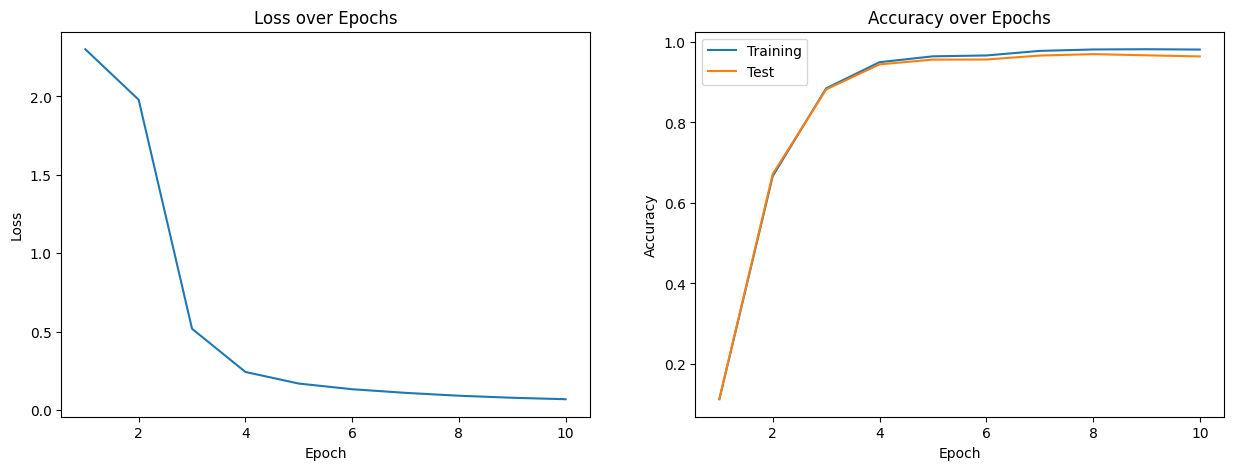

avg acc change / epoch (Training set): 0.0965
avg acc change / epoch (Test set): 0.0945
avg loss change / epoch: -0.2479


In [34]:
mln = MultiLayerNetwork(input_size=784, hidden_size=256, output_size=10, loss_fn=cross_entropy, loss_fn_grad=cross_entropy_grad, acc_fn=naive_acc)
mln.train(X_train, y_train_one_hot, X_test, y_test_one_hot, learning_rate=0.01, epochs=10, batch_size=64)
mln.summary()

We can see that the loss is constantly decreasing. Overall, the model learns very well from the data, which is reflected in the final accuracy score:

In [35]:
mln.evaluate(X_test, y_test_one_hot)

0.9641

The accuracy indicates a good generalization of the data.

### Finding the right hyperparameters

To find the right hyperparameters, we again perform a brute force grid search, testing different combinations of parameters. The best combination based on accuracy is then saved.

The values chosen for the brute force testing are based on common practices that we found during our research of other implementations of multi layer neural networks.

In [36]:
epochs = [10, 15 ,20]
batch_sizes = [16, 64, 256, 512]
learning_rates = [0.1, 0.01, 0.0001]
hidden_sizes = [256, 512]
combinations = get_param_combinations(epochs, batch_sizes, learning_rates, hidden_sizes)

def test_brute_force_multi_layer(param_combos, X_train, y_train, X_test, y_test):
    """
    Tests the MultiLayerNetwork model with a brute-force approach by iterating over all parameter combinations and
    evaluating their accuracy.

    :param param_combos: List of parameter combinations to be tested.
    :param X_train: Training data.
    :param y_train: Training labels.
    :param X_test: Test data.
    :param y_test: Test labels.

    :returns: A tuple containing the highest accuracy achieved and the corresponding parameter combination.
    """
    results = []
    best_acc = 0
    best_param_combo = None

    for i in range(len(param_combos)):
        try:
            e, b, l, h = param_combos[i]
            net = MultiLayerNetwork(input_size=784, hidden_size=h, output_size=10, loss_fn=cross_entropy, loss_fn_grad=cross_entropy_grad, acc_fn=naive_acc)

            net.train(X_train, y_train, X_test, y_test, learning_rate=l, epochs=e, batch_size=b, output=False)
            acc = net.evaluate(X_test, y_test_one_hot)

            results.append((e, b, l, h, acc))
            if acc > best_acc:
                best_acc = acc
                best_param_combo = param_combos[i]

            print(f"combo {i+1}/{len(param_combos)}: - Epochs: {e} - Batch size: {b} - Learning rate: {l} - Hidden size: {h} - Accuracy: {acc:.4f}")
        except Exception as e:
            print(f"Error: {e}")
            continue

    return best_acc, best_param_combo

ml_combos = get_param_combinations(epochs, batch_sizes, learning_rates, hidden_sizes)
print(f"Testing {len(ml_combos)} parameter combinations")

Testing 72 parameter combinations


In [33]:
# test_brute_force_multi_layer(ml_combos, X_train, y_train_one_hot, X_test, y_test_one_hot)

```
combo 1/54: - Epochs: 10 - Batch size: 64 - Learning rate: 0.1 - Hidden size: 256 - Accuracy: 0.0980
combo 2/54: - Epochs: 10 - Batch size: 64 - Learning rate: 0.1 - Hidden size: 512 - Accuracy: 0.0980
combo 3/54: - Epochs: 10 - Batch size: 64 - Learning rate: 0.01 - Hidden size: 256 - Accuracy: 0.9723
combo 4/54: - Epochs: 10 - Batch size: 64 - Learning rate: 0.01 - Hidden size: 512 - Accuracy: 0.9725
combo 5/54: - Epochs: 10 - Batch size: 64 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.1135
combo 6/54: - Epochs: 10 - Batch size: 64 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.1135
combo 7/54: - Epochs: 10 - Batch size: 256 - Learning rate: 0.1 - Hidden size: 256 - Accuracy: 0.1135
combo 8/54: - Epochs: 10 - Batch size: 256 - Learning rate: 0.1 - Hidden size: 512 - Accuracy: 0.0980
combo 9/54: - Epochs: 10 - Batch size: 256 - Learning rate: 0.01 - Hidden size: 256 - Accuracy: 0.9718
combo 10/54: - Epochs: 10 - Batch size: 256 - Learning rate: 0.01 - Hidden size: 512 - Accuracy: 0.9740
combo 11/54: - Epochs: 10 - Batch size: 256 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.1135
combo 12/54: - Epochs: 10 - Batch size: 256 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.1135
combo 13/54: - Epochs: 10 - Batch size: 512 - Learning rate: 0.1 - Hidden size: 256 - Accuracy: 0.0974
combo 14/54: - Epochs: 10 - Batch size: 512 - Learning rate: 0.1 - Hidden size: 512 - Accuracy: 0.0980
combo 15/54: - Epochs: 10 - Batch size: 512 - Learning rate: 0.01 - Hidden size: 256 - Accuracy: 0.9723
combo 16/54: - Epochs: 10 - Batch size: 512 - Learning rate: 0.01 - Hidden size: 512 - Accuracy: 0.9774
combo 17/54: - Epochs: 10 - Batch size: 512 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.1135
combo 18/54: - Epochs: 10 - Batch size: 512 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.1135
combo 19/54: - Epochs: 15 - Batch size: 64 - Learning rate: 0.1 - Hidden size: 256 - Accuracy: 0.0980
combo 20/54: - Epochs: 15 - Batch size: 64 - Learning rate: 0.1 - Hidden size: 512 - Accuracy: 0.0980
combo 21/54: - Epochs: 15 - Batch size: 64 - Learning rate: 0.01 - Hidden size: 256 - Accuracy: 0.9718
combo 22/54: - Epochs: 15 - Batch size: 64 - Learning rate: 0.01 - Hidden size: 512 - Accuracy: 0.9682
combo 23/54: - Epochs: 15 - Batch size: 64 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.1135
combo 24/54: - Epochs: 15 - Batch size: 64 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.1135
combo 25/54: - Epochs: 15 - Batch size: 256 - Learning rate: 0.1 - Hidden size: 256 - Accuracy: 0.1010
combo 26/54: - Epochs: 15 - Batch size: 256 - Learning rate: 0.1 - Hidden size: 512 - Accuracy: 0.0980
combo 27/54: - Epochs: 15 - Batch size: 256 - Learning rate: 0.01 - Hidden size: 256 - Accuracy: 0.9712
combo 28/54: - Epochs: 15 - Batch size: 256 - Learning rate: 0.01 - Hidden size: 512 - Accuracy: 0.9779
combo 29/54: - Epochs: 15 - Batch size: 256 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.1135
combo 30/54: - Epochs: 15 - Batch size: 256 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.1135
combo 31/54: - Epochs: 15 - Batch size: 512 - Learning rate: 0.1 - Hidden size: 256 - Accuracy: 0.0980
combo 32/54: - Epochs: 15 - Batch size: 512 - Learning rate: 0.1 - Hidden size: 512 - Accuracy: 0.1028
combo 33/54: - Epochs: 15 - Batch size: 512 - Learning rate: 0.01 - Hidden size: 256 - Accuracy: 0.9430
combo 34/54: - Epochs: 15 - Batch size: 512 - Learning rate: 0.01 - Hidden size: 512 - Accuracy: 0.0980
combo 35/54: - Epochs: 15 - Batch size: 512 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.1135
combo 36/54: - Epochs: 15 - Batch size: 512 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.1135
combo 37/54: - Epochs: 20 - Batch size: 64 - Learning rate: 0.1 - Hidden size: 256 - Accuracy: 0.0980
combo 38/54: - Epochs: 20 - Batch size: 64 - Learning rate: 0.1 - Hidden size: 512 - Accuracy: 0.0980
combo 39/54: - Epochs: 20 - Batch size: 64 - Learning rate: 0.01 - Hidden size: 256 - Accuracy: 0.9747
combo 40/54: - Epochs: 20 - Batch size: 64 - Learning rate: 0.01 - Hidden size: 512 - Accuracy: 0.9773
combo 41/54: - Epochs: 20 - Batch size: 64 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.1135
combo 42/54: - Epochs: 20 - Batch size: 64 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.1135
combo 43/54: - Epochs: 20 - Batch size: 256 - Learning rate: 0.1 - Hidden size: 256 - Accuracy: 0.1135
combo 44/54: - Epochs: 20 - Batch size: 256 - Learning rate: 0.1 - Hidden size: 512 - Accuracy: 0.1135
combo 45/54: - Epochs: 20 - Batch size: 256 - Learning rate: 0.01 - Hidden size: 256 - Accuracy: 0.9745
combo 46/54: - Epochs: 20 - Batch size: 256 - Learning rate: 0.01 - Hidden size: 512 - Accuracy: 0.9721
combo 47/54: - Epochs: 20 - Batch size: 256 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.1135
combo 48/54: - Epochs: 20 - Batch size: 256 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.1135
combo 49/54: - Epochs: 20 - Batch size: 512 - Learning rate: 0.1 - Hidden size: 256 - Accuracy: 0.1032
combo 50/54: - Epochs: 20 - Batch size: 512 - Learning rate: 0.1 - Hidden size: 512 - Accuracy: 0.0980
combo 51/54: - Epochs: 20 - Batch size: 512 - Learning rate: 0.01 - Hidden size: 256 - Accuracy: 0.9680
combo 52/54: - Epochs: 20 - Batch size: 512 - Learning rate: 0.01 - Hidden size: 512 - Accuracy: 0.9457
combo 53/54: - Epochs: 20 - Batch size: 512 - Learning rate: 0.0001 - Hidden size: 256 - Accuracy: 0.1135
combo 54/54: - Epochs: 20 - Batch size: 512 - Learning rate: 0.0001 - Hidden size: 512 - Accuracy: 0.1135
(0.9779, (15, 256, 0.01, 512))
```

Given the brute force testing with the reasonably defined values for the hyperparameters above, the best result was achieved with the following parameter combination:

**Accuracy on the test set**: $0.9779$
(epochs=15, batch_size=256, lr=0.01, hidden_size=512)

## Summary
This notebook consists of five tasks related to machine learning using the MNIST dataset. These tasks include data exploration, creating neural networks, training the network, evaluating its performance, and making improvements by changing its parameters accordingly.

In the first task, the MNIST dataset is processed, and the data is transformed, normalized, reshaped, and split into training and testing sets. The visualization gives us a first insight into how the dataset is built.

The goal of the second task is to explain the implementation of a Linear Layer class that represents a linear layer in a neural network. The class has three main functions: `forward`, `backward`, and `update`. The `forward` function computes the output of the layer, the `backward` function computes the gradient of the loss with respect to the layer's weights, biases, and inputs, and the `update` function updates the weights and biases using gradient descent. The notebook also includes unit tests for the `LinearLayer` class using the `unittest` module to ensure the class and its functions are working correctly.

In Task 3, the focus is on finding the best loss function and accuracy metric for binary classification of MNIST images. Specifically, the task is to classify whether a digit is a 4 or not. After evaluating several loss functions, we found that the Focal Loss function is best suited for this task. This is because its great for cases in which there is a class imbalance.

We first tried to fit the network using the more common Binary Cross-Entropy function. Although the model is heavily biased towards predicting non-4 digits, resulting in poor performance on test data. To counter this bias, the code creates three subsets of the MNIST dataset: one with only images of the number 4, one with only images of other digits, and one with an equal representation of both. The Single Layer model was trained on this modified dataset and evaluated against the three subsets individually, as well as the original test set. The goal was to reach a high accuracy/precision in all four sets, indicating that the model can correctly identify 4s and non-4s and is not strongly biased towards either one. This did not lead to satisfying results which meant we needed to find a better solution which was, as mentioned in the paragraph above, the Focal Loss function.

In terms of accuracy metrics, the F1-Score is best suited for this task as it balances false positives and false negatives and ensures that both are adequately accounted for. Other metrics, such as naive accuracy, can be misleading because they do not reflect the accuracy of identifying 4s. The F1-Score is a more comprehensive and balanced choice for this particular classification task.

The `SingleLayerNetwork` class is a simple neural network. It has a single hidden layer and is trained with mini-batch gradient descent. The methods of the network include initializing the network parameters, forward and backward passes, updating the weights and biases of the layers, training the network with given data, making predictions, and evaluating the accuracy of the network. The class inherits from the `LinearLayer` class and has some methods defined in it. The `NetworkDevelopment` class is utilized for generating a summary of the network's development.

In the fourth task, the goal was to find the best combination of hyperparameters for a neural network. To accomplish this, a brute force method was used to train the network with different learning rates, epochs, hidden layer sizes, and batch sizes. The results for each combination were then stored and analyzed to determine the best combination of hyperparameters. After a long process, the best result was achieved with 5 epochs, batch size of 64, learning rate of 0.0001, and hidden size of 512, with an accuracy of 0.6511.

For the final task, the neural network was extended with three hidden layers of the same size and 10 outputs to correctly classify all digits in the MNIST dataset. The preferred loss function for this task is cross entropy, which effectively handles probabilistic outputs. Moreover, the standard accuracy metric is the best choice for the MNIST classification task because it effectively captures the proportion of correctly classified examples. To represent the categorical data in a numerical format, we used one-hot encoding, which converts each digit into a binary vector of length 10.

The `MultiLayerNetwork` class is a neural network with multiple layers, capable of training and evaluating the model on a given dataset. It implements the necessary functions for forward and backward propagation in the network, such as initializing the network, computing the predicted output of the network, computing the gradients of the network's weights and biases, updating the weights and biases of the network based on the gradients computed, training the network on the given data and computing the accuracy and loss of the predicted and true output, and finally printing a summary of the network's training and validation accuracy and loss for each epoch, as well as the average improvements per epoch. This class uses three hidden layers and an output layer.

The network is trained on a set of labeled images and tested on a separate set of images to evaluate its accuracy. The code shows the models loss decreasing during training and its final accuracy score, which indicates that the model generalizes well to new data. To find the best hyperparameters, a brute force grid search is performed, testing different combinations of parameters.

In this challenge, we explored different aspects of machine learning using the MNIST dataset. We processed the data, implemented neural networks, tested various loss functions and accuracy metrics, and optimized hyperparameters. Overall, this challenge provided an excellent opportunity to gain hands-on experience in machine learning and neural networks.

## Learning diary

### KW13 — Week 1

#### Accomplishments
First implementations of neural networks with `numpy` only (ChatGPT assisted) in order to get a better understanding of the concepts and logic. It turns out that ChatGPT is not always as great as it seems to mostly provide generalized solutions and it needs a lot of prompt engineering to get a desired output.

#### Resources
- [ChatGPT](https://chat.openai.com) — <em>used for all exercises</em>
- [Neural networks Playlist by 3blue1brown](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) — <em>for getting a general understanding of NNs</em>
- [MIT Introduction to Deep Learning](https://www.youtube.com/watch?v=QDX-1M5Nj7s) — <em>for getting a general understanding of NNs</em>

### KW14 — Week 2

#### Accomplishments
Finished first <em>tentative</em> iteration of all exercises. We found that some weird behavior is still present like spiking in the loss-graph. Its implementation could be improved as we mostly copied the ChatGPT answer. Some further things like mathematical formulas and explanations are missing.

#### Resources
- [ChatGPT](https://chat.openai.com) — <em>used for the first iteration of mathematical fromulas/explanations</em>


### KW15 — Week 3

#### Accomplishments
Further research was done to identify better approaches: We figured out that **Focal Loss** should in theory be a better fit for the `SingleLayerNetwork` since it counteracts imbalanced sets (like in Task 3). However, we were unable to get it up and running with `numpy` only - All libraries use advanced techniques that require other dependencies which we are not allowed to use.

#### Resources
- [ChatGPT](https://chat.openai.com) — <em>used for Focal Loss implementation/description</em>
- [Tsung-Yi Lin et al. “Focal Loss for Dense Object Detection”](https://arxiv.org/abs/1708.02002) — <em>to acquire a mathematical understanding of Focal Loss together with ChatGPT output(s)</em>

### KW16 — Week 4

#### Accomplishments
This week we wanted to finally decide on a robust loss function for both the `SingleLayerNetwork` and the `MultiLayerNetwork`: We found that there are a bunch of different loss functions that are used in the context of neural networks. We wanted to take a deeper look into how each of those functions would perform in the case of our `SingleLayerNetwork` and `MultiLayerNetwork`.

**Results that lead to our decision**:
- **Kullback-Leibler**: Too complicated as its implementation has many requirements
- **Mean squared error (MSE)**: Performed weakly, focuses too hard on regression
- **Focal Loss**: Great in class imbalance scenarios (like Task 3) but seems to be extremely laborious to implement with just `numpy`
- **Cross-Entropy**: Ideal for Task 4 and 5 because of its probabilistic approach 
    - **We finally decided to stick to Cross-Entropy for our `MultiLayerNetwork` and Binary Cross-Entropy for the `SingleLayerNetwork`**
<em>Further notes on each tested loss function were made in the corresponding sections in the notebook.</em>

To measure performance we needed the right method. We first implemented a simple **Accuracy-Function** which just measured $\frac{TP + TN}{TP + TN + FN + FP}$. After some further research and a conversation with Stefan we decided to implement the **F1-Score** as its more suited towards the task 3 because of the imbalance in the dataset.

The F1 score is always 0 when training. To understand this result, we used a confusion matrix to understand in which direction the model was trained. We've learned that the model is constantly guessing non-4s in the dataset, leading to the high simple accuracy but low F1 score.

Furthermore we also dug deeper into the subject of following **Activation-Functions**: 
- **ReLU**: Seems to be best practice in most cases. It's very efficient and has no sigmoid-related issues like <em>vanishing gradients</em> which would lead to slower learning or convergence.
- **Leaky ReLU**: Vanilla ReLU but takes better care of dead neurons (neurons which are updated to never activate again).
- **Parametric ReLU (PReLU)**: Similar to Leaky ReLU but it implements a negative slope as a learnable parameter.
- **Sigmoid**: The main problem lies in the vanishing gradient problem which causes slow or stalled learning in neural networks. Vanishing gradients consist of a product of derivatives (chain rule) which approaches a value close to zero which makes the gradient <em>vanish</em>.

We invested a lot in the implementation of the Focal loss function. The problem was certainly the gradient of the function. Our main problem was that the model loss did not decrease continuously and did not lead to better results. Also, testing with different hyperparameters was not successful.

We first continued to work with BCE for Task 3 and countered the data imbalance by remixing the data into different subsets to equalize the bias. Though we were not satisfied with the results. Thats when we found another hopeful resource to delve back into the subject of Focal Loss.

> Remember that sometimes not getting what you want is a wonderful stroke of luck.

We finally got the focal loss to work. It performs relatively well on the whole dataset. In fact, better than the network trained on the mixed version of the data set using BCE. **So we now turned to the focal loss**, which is in itself just a modified version of the BCE, but with better imbalance handling regarding the dataset. The source of [Max Halford](https://maxhalford.github.io/blog/lightgbm-focal-loss/#formulas-for-focal-loss) helped us to implement the Focal loss with a clear mathematical understandig and without the mixed signals ChatGPT gave us before.

The gradient test case has been reworked to enable unit testing. Now the numerical gradient is compared to the analytical gradient of the linear layer.

#### Resources
- [ChatGPT](https://chat.openai.com) — <em>used to find alternative loss functions and their `numpy`-less implementations</em>
- [Kullback-Leibler Divergence (Wikipedia)](https://www.wikiwand.com/en/Kullback%E2%80%93Leibler_divergence) — <em>for getting a general mathematical understanding of KL-Divergence</em>
- [Understanding KL-Divergence (towardsdatascience.com)](https://towardsdatascience.com/understanding-kl-divergence-f3ddc8dff254) — <em>for getting a general practical understanding of KL-Divergence</em>
- [Tsung-Yi Lin et al. “Focal Loss for Dense Object Detection”](https://arxiv.org/abs/1708.02002) — <em>for finally understanding and implementing the focal loss function



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=88bc6171-47da-4cbc-96f1-ee851c7ac9ec' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>